# Section 2

In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [2]:
print('To use color, just append color.BOLD to the beginning of the printed string and color.END to the end:')
print(color.BOLD + 'Like This!' + color.END)

To use color, just append color.BOLD to the beginning of the printed string and color.END to the end:
Like This!


Implement the mean absolute error:
$$
MAE = \frac{1}{N}\sum_{i=1}^N |y_i-x_i^\top\theta|
$$

In [3]:
import math
def get_MAE(theta, X, y):
    ypred = X@theta.T
    mae = np.average(np.abs(ypred - y), axis=0)
    
    # compare to MAE from sklearn:
    mae_sklr = mean_absolute_error(X@theta.T, y)
    assert(math.isclose(mae, mae_sklr))
    return mae

In [4]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X, X_test, Y, Y_test = train_test_split(diabetes['data'],
                                        np.expand_dims(diabetes['target'], 1),
                                        test_size=0.5,
                                        random_state=0)

# Add bias column to data:
X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
X_test = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)

In [5]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

## Question 2.2
Implement below the mean-absolute error regression with LASSO. Use $\lambda=0.5$. Hints: in the X matrix, rows represent data samples. Also, don't forget to add the `1` column to capture the intercept. (Use the `GLPK` solver)

In [6]:
# Function to solve LPs 
def solve_LP(X, Y, lambda_):
    d = X.shape[1]
    N = X.shape[0]

    # auxiliary variables:
    Z = cp.Variable((N, 1))
    delta = cp.Variable((d, 1))

    # variable to solve:
    theta = cp.Variable((1, d))

    # linear program:
    prob = cp.Problem(cp.Minimize(cp.sum(Z) + lambda_ * cp.sum(delta)), [
        Y - X @ theta.T <= Z, -Y + X @ theta.T <= Z, theta <= delta,
        -theta <= delta
    ])

    # solve LP:
    prob.solve(solver=cp.GLPK)
    theta_opt = theta.value
    opt_value = prob.value
    dual_value = prob.constraints[0].dual_value
    return theta_opt, opt_value, dual_value 

In [7]:
lambda_ = 0.5
theta_opt, opt_value, dual_value = solve_LP(X, Y, lambda_)

# Print results:
print("\nThe optimal value is", opt_value)
print("A solution theta is")
print(theta_opt)
print(f'Shape of solution:{theta_opt.shape}')

#print("A dual solution is")
#print(dual_value)


The optimal value is 11445.710197717646
A solution theta is
[[ -51.47950716 -283.5546057   283.5546057   283.5546057   230.32938182
  -283.5546057  -283.5546057   261.8422169   283.5546057   218.40032129
   146.14649363]]
Shape of solution:(1, 11)


In [8]:
print(color.BOLD + 'Training Results' + color.END)
print('MAE: {}'.format(get_MAE(theta_opt, X, Y)))
print('\n')
print(color.BOLD + 'Test Results' + color.END)
print('MAE: {}'.format(get_MAE(theta_opt, X_test, Y_test)))

Training Results
MAE: [44.73375505]


Test Results
MAE: [45.43096897]


## Question 2.3
Implement Cross-Validation for your MAE LASSO regression. You may recycle any functions used above. Hint: Use the `sklearn` function `train_test_split`, which can be used to randomly split the data.

Use cross-validation to tune the hyperparameter $\lambda$. Randomly select 75% of the data to construct Dtrain and use the rest of the data to construct Dval. Use 50 logarithmically spaced values between [10e-5; 10e-1] as candidates for $\lambda$, select the one performing best on the validation set in terms of MAE. Compare again the test performance against the training performance.

In [9]:
10e-5, 10e-1, 1e-1

(0.0001, 1.0, 0.1)

In [10]:
# Hyperparameters:
lambda_ = np.logspace(-5, -1, 50, base = 10)
lambda_

array([1.00000000e-05, 1.20679264e-05, 1.45634848e-05, 1.75751062e-05,
       2.12095089e-05, 2.55954792e-05, 3.08884360e-05, 3.72759372e-05,
       4.49843267e-05, 5.42867544e-05, 6.55128557e-05, 7.90604321e-05,
       9.54095476e-05, 1.15139540e-04, 1.38949549e-04, 1.67683294e-04,
       2.02358965e-04, 2.44205309e-04, 2.94705170e-04, 3.55648031e-04,
       4.29193426e-04, 5.17947468e-04, 6.25055193e-04, 7.54312006e-04,
       9.10298178e-04, 1.09854114e-03, 1.32571137e-03, 1.59985872e-03,
       1.93069773e-03, 2.32995181e-03, 2.81176870e-03, 3.39322177e-03,
       4.09491506e-03, 4.94171336e-03, 5.96362332e-03, 7.19685673e-03,
       8.68511374e-03, 1.04811313e-02, 1.26485522e-02, 1.52641797e-02,
       1.84206997e-02, 2.22299648e-02, 2.68269580e-02, 3.23745754e-02,
       3.90693994e-02, 4.71486636e-02, 5.68986603e-02, 6.86648845e-02,
       8.28642773e-02, 1.00000000e-01])

In [11]:
# 75% split:
X, X_test, Y, Y_test = train_test_split(diabetes['data'], 
                                        np.expand_dims(diabetes['target'], 1), 
                                        test_size=0.25, random_state=0)
# Add bias column to data:
X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
X_test = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)

e_train, e_val, thetas, opt_val = [], [], [], []

# Cross-validation for 50 values of lambda:
for l in lambda_:
    theta_opt, opt_value, dual_value = solve_LP(X, Y, l)
    thetas.append(theta_opt)
    opt_val.append(opt_value)
    
    # evaluate on training set:
    e_train.append(get_MAE(theta_opt, X, Y))
    # evaluate on validation set:
    e_val.append(get_MAE(theta_opt, X_test, Y_test))
    
# take hyperparameter with smallest validation error:
best_lambda = lambda_[np.argmin(e_val)]
best_theta = thetas[np.argmin(e_val)]
best_value = opt_val[np.argmin(e_val)]

print('---Optimal values--')
print(f'Optimal lambda: {best_lambda}')
print(f'Optimal value: {best_value}')
print(f'Optimal theta:\n {best_theta}')

---Optimal values--
Optimal lambda: 1e-05
Optimal value: 14049.767709383283
Optimal theta:
 [[ -92.16098723 -395.97698534  519.77616597  481.64782868 -678.55108228
   329.09131198  -24.47791508  160.42995544  710.11019731  -35.22195801
   154.98880513]]


In [12]:
print(color.BOLD + 'Training Results' + color.END)
print('MAE: {}'.format(get_MAE(best_theta, X, Y)))
print('\n')
print(color.BOLD + 'Test Results' + color.END)
print('MAE: {}'.format(get_MAE(best_theta, X_test, Y_test)))

Training Results
MAE: [42.44619214]


Test Results
MAE: [46.42494076]


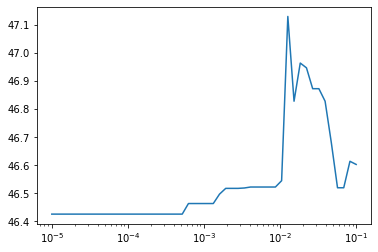

In [13]:
fig, ax = plt.subplots(1)
ax.plot(lambda_, e_val)
ax.set_xscale('log')